Reto 1 - ¿Cuántas monedas hay?
==
Hardware de Aplicación Específica
--
---
###### José Luis Garrido Labrador

In [31]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as ptc

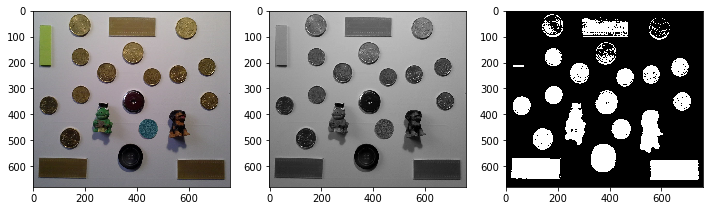

In [24]:
nombre = "Reto1.jpg"
img = cv2.imread("../images/"+nombre,1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgb = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
imgh = cv2.cvtColor(img,cv2.COLOR_RGB2HSV_FULL)

_,imgL = cv2.threshold(imgb,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

images = [img,imgb,imgL]
plt.figure(figsize=(12,24))

for i in range(len(images)):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],cmap='gray')

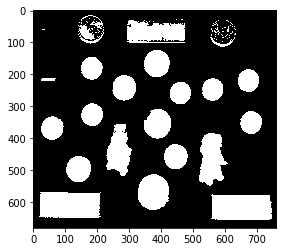

In [25]:
h, w = imgL.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

imbnF = imgL.copy()

cv2.floodFill(imbnF,mask, (0,0), 255)
imbnI = cv2.bitwise_not(imbnF)
imbnHF = imgL | imbnI
plt.imshow(imbnHF,cmap='gray')

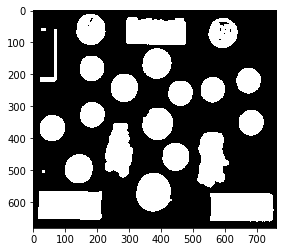

In [26]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))

dil = cv2.dilate(imbnHF,se,iterations = 1)

plt.imshow(dil,cmap='gray')

In [29]:
im2, contours, hierarchy = cv2.findContours(dil,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

areas = []
perimetros = []
for c in contours:
    areas.append(cv2.contourArea(c))
    perimetros.append(cv2.arcLength(c,True))
    
c2 = []
a2 = []
p2 = []
for i in range(len(contours)):
    if areas[i] > 1000:
        c2.append(contours[i])
        a2.append(areas[i])
        p2.append(perimetros[i])
        
print("Cantidad de objetos:",len(contours))
print("Cantidad de objetos mayores de 1000px:",len(c2))

Cantidad de objetos: 36
Cantidad de objetos mayores de 1000px: 21


In [30]:
margen = 0.15
a3 = []
p3 = []
c3 = []

#Solamente los círculos
for i in range(len(c2)):
    a = a2[i]
    p = p2[i]
    
    if not((1-margen) >= (4*np.pi*a)/(p*p) or (4*np.pi*a)/(p*p)>= (1+margen)):
        c3.append(c2[i])
        a3.append(a)
        p3.append(p)
        
#Solamente dorados
a4 = []
p4 = []
c4 = []
ctr = []
for c in c3:
    M = cv2.moments(c)

    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    ctr.append((cX,cY))

h = 31
marh = 90
ctr4 = []
for i in range(len(c3)):
    cX = ctr[i][0]
    cY = ctr[i][1]
    aux = imgh[cY-5 : cY+5,cX-5 : cX+5,0]
    hi = np.mean(aux)
    if not ((h-marh) >= hi or hi >= (h+marh)):
        c4.append(c3[i])
        p4.append(p3[i])
        a4.append(a3[i])
        ctr4.append(ctr[i])
        
print("Cantidad de círculos:",len(c3))
print("Cantidad de monedas:",len(c4))

Cantidad de círculos: 15
Cantidad de monedas: 12


### Cálculo de valores

Hay un total de 2.6 euros. En monedas: 10 cent 7  20 cent 2 y 50 cent 3


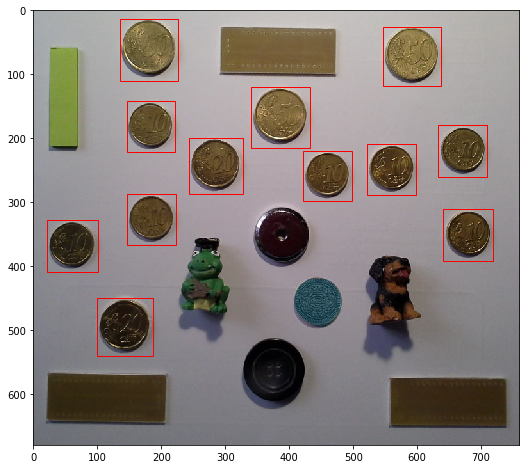

In [35]:
m10 = 0
m20 = 0
m50 = 0
#Eurístico
d10 = 79
d20 = 88
d50 = 93.5
total = 0
mart = 3

#BoundingBox:
bb = []
for c in c4:
    bb.append(cv2.boundingRect(c))

fig,ax = plt.subplots(1)
fig.set_size_inches(12,8)
ax.imshow(img,)
for i in range(len(c4)):
    x,y,w,h = bb[i]
    rect = ptc.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
    d = np.sqrt((4*a4[i]/np.pi))
    if (d10 - mart) <= d and d <= (d10 + mart):
        m10 += 1
        total += 0.1
    elif (d20 - mart) <= d and d <= (d20 + mart):
        m20 += 1
        total += 0.2
    elif (d50 - mart) <= d and d <= (d50 + mart):
        m50 += 1
        total += 0.5
        
print("Hay un total de",np.round(total,3),"euros. En monedas: 10 cent",m10," 20 cent",m20,"y 50 cent",m50)
    